In [1]:
%config Completer.use_jedi = False # makes autocomplete work faster

In [2]:
# import sys
# !pip install  --prefix {sys.prefix} concepts

# FCA Boiler

Demonstrate use of the formal concept analysis method for building a concept hierarchy from decomposed vaccine codes. For the algorithm to work we need to code all attributes as binary. First we present a simple example using Anthrax vaccines.

In [1]:
from concepts import Context
import pandas as pd
import os
# print(os.getcwd())

In [4]:
# read in the formal context
csv_file=os.getcwd() + '\\anthrax_formal_concept.csv'
pd.read_csv(csv_file, keep_default_na=False)
# csv_file='C:\\Users\\adam.DESKTOP-D3KQQA1\\Desktop\\test_formal_context.csv'

,Unnamed: 0,d_anthrax,m_cell_free_filtrate,m_live_attenuated,f_absorbed,f_precipitated,f_STI_1,f_A16R
0,Vaccine,X,,,,,,
1,anthrax vaccine,X,,,,,,
2,anthrax vaccine; cell free filtrate,X,X,,,,,
3,anthrax vaccine; live attenuated,X,,X,,,,
4,anthrax vaccine; cell free filtrate; anthrax v...,X,X,,X,,,
5,anthrax vaccine; cell free filtrate; anthrax v...,X,X,,,X,,
6,anthrax vaccine; live attenuated; Russian (STI...,X,,X,,,X,
7,anthrax vaccine; live attenuated; China (A16R ...,X,,X,,,,X


Note that there is one row per vaccine and one column per attribute. The rows are meant to represent possible source vaccine values which have a name and one or more attributes. Vaccines (rows) are essentially defined by their attributes and we should probably ensure that the input to FCA (this table) has only one row per unique set of attributes (i.e. there are not two rows with the same set of attributes). Attributes are grouped into three types: Disease (d_...), Mechanism (m_...), Formulation (f_...). The input to FCA needs to be in this format.

In [5]:
# create the context object from the csv file
c = Context.fromfile(csv_file, frmat='csv')

In [6]:
# The lattice contains all of the nodes in the lattice after running FCA
for a in c.lattice:
    print(a, "\n**************************************\n")

{} <-> [d_anthrax m_cell_free_filtrate m_live_attenuated f_absorbed f_precipitated f_STI_1 f_A16R] 
**************************************

{anthrax vaccine; cell free filtrate; anthrax vaccine adsorbed (AVA)} <-> [d_anthrax m_cell_free_filtrate f_absorbed] <=> anthrax vaccine; cell free filtrate; anthrax vaccine adsorbed (AVA) <=> f_absorbed 
**************************************

{anthrax vaccine; cell free filtrate; anthrax vaccine precipitated (AVP)} <-> [d_anthrax m_cell_free_filtrate f_precipitated] <=> anthrax vaccine; cell free filtrate; anthrax vaccine precipitated (AVP) <=> f_precipitated 
**************************************

{anthrax vaccine; live attenuated; Russian (STI-1 strain)} <-> [d_anthrax m_live_attenuated f_STI_1] <=> anthrax vaccine; live attenuated; Russian (STI-1 strain) <=> f_STI_1 
**************************************

{anthrax vaccine; live attenuated; China (A16R strain)} <-> [d_anthrax m_live_attenuated f_A16R] <=> anthrax vaccine; live attenuated; Ch

Each node in the concept lattice has an extent and an intent. The extent is the set of vaccines (rows in the source table) that are descendants of the node. The intent is the set of attributes implied by the node. The first node in the lattice is very bottom of the graph. It implies all attributes and since no vaccine has all attributes its extend is empty. The last node printed above only implies the disease attribute anthrax so the extent includes all vaccines. 

In [7]:
# put the concepts into a list
concept_list = [a for a in c.lattice]

In [8]:
len(concept_list)

8

In [9]:
# Define a function that returns the desired name for a concept. 
# If the concept matches one vaccine extactly then use that. 
# Otherwise use the concatenation of the attributes as the name.
def get_concept_name(concept):
    if(len(concept.extent) == 1):
        # If there is only 1 vaccine captured by the concept
        # use that vaccine as the vaccine name
        nm = concept.extent[0]
    else:
        # otherwise use the attributes as a name
        nm = "; ".join(list(concept.intent))
    return nm

# Get all the concept names as a list      
concept_names = [get_concept_name(a) for a in concept_list]

In [10]:
concept_names

['d_anthrax; m_cell_free_filtrate; m_live_attenuated; f_absorbed; f_precipitated; f_STI_1; f_A16R',
 'anthrax vaccine; cell free filtrate; anthrax vaccine adsorbed (AVA)',
 'anthrax vaccine; cell free filtrate; anthrax vaccine precipitated (AVP)',
 'anthrax vaccine; live attenuated; Russian (STI-1 strain)',
 'anthrax vaccine; live attenuated; China (A16R strain)',
 'd_anthrax; m_cell_free_filtrate',
 'd_anthrax; m_live_attenuated',
 'd_anthrax']

In [11]:
# we will use the index of a concept as its identifier
# The index function will return the id when given a concept
concept_list.index(concept_list[5])

5

In [12]:
# Build the concept relationship tables
# for each concept in the concept list, get the indicies of the parents. 
# we want a list of tuples pairs that represents the child parent relationships

maps_to_list = []

for idx, con in enumerate(concept_list):
#     idx = concept_list.index(con)
    parent_concept_indexes = [concept_list.index(c) for c  in list(con.upper_neighbors)]
    for parent_idx in parent_concept_indexes:
        maps_to_list.append((idx, parent_idx))

print(maps_to_list)


[(0, 1), (0, 2), (0, 3), (0, 4), (1, 5), (2, 5), (3, 6), (4, 6), (5, 7), (6, 7)]


In [13]:
# create a concept dataframe
concept_names

['d_anthrax; m_cell_free_filtrate; m_live_attenuated; f_absorbed; f_precipitated; f_STI_1; f_A16R',
 'anthrax vaccine; cell free filtrate; anthrax vaccine adsorbed (AVA)',
 'anthrax vaccine; cell free filtrate; anthrax vaccine precipitated (AVP)',
 'anthrax vaccine; live attenuated; Russian (STI-1 strain)',
 'anthrax vaccine; live attenuated; China (A16R strain)',
 'd_anthrax; m_cell_free_filtrate',
 'd_anthrax; m_live_attenuated',
 'd_anthrax']

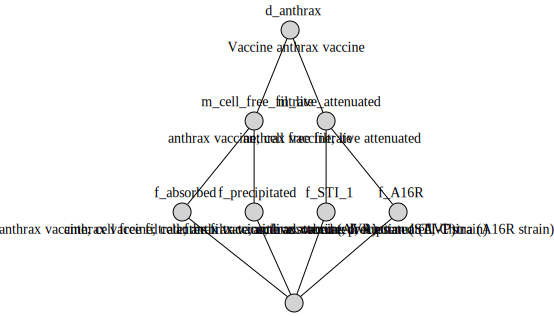

In [14]:
c.lattice.graphviz()

In [16]:
help(c.lattice.graphviz)

Help on method graphviz in module concepts.lattices:

graphviz(filename=None, directory=None, render=False, view=False, make_object_label=<built-in method join of str object at 0x000001B3A18840B0>, make_property_label=<built-in method join of str object at 0x000001B3A18840B0>, **kwargs) method of concepts.lattices.Lattice instance
    Return DOT source for visualizing the lattice graph.
    
    Args:
        filename: Path to the DOT source file for the Digraph.
        directory: (Sub)directory for DOT source saving and rendering.
        render (bool): Call ``.render()`` on the result.
        view (bool): Call ``.render(view=True)`` on the result.
        make_object_label: Callable with iterable of objects argument
                           returning a string to be used as object label.
        make_property_label: Callable with iterable of properties argument
                             returning a string to be used as object label.
    Returns:
        A ``graphviz.Digraph`` i

Now we will try to run the same algorithm on the entire concept table. First we need to get the data into the correct format though.


In [17]:
df = pd.read_excel(os.getcwd() + "\\Vaccine Vocabulary Lookup.xlsx", keep_default_na=False)

In [18]:
df = df[~df['concept_class_id'].isin(["OMOP_Vaccine_Brand", "OMOP_Vaccine"])] \
    .rename(columns = {"concept_name_1":"concept_name"}) 


In [19]:
df = df[['concept_name', "attribute_disease", "attribute_mechanism", "attribute_formulation"]]

In [20]:
df = df.set_index("concept_name").stack()

In [21]:
df = pd.DataFrame(df).reset_index() \
    .rename(columns = {"level_1":"attribute", 0 : "value"})
#df.reset_index(level=0, inplace=True)

In [22]:
# get rid of rows where value is empty
df = df[~df["value"].isin([''])]

In [23]:
df = df.assign(value = [s.split("|") for s in list(df["value"])]).explode("value")

In [24]:
df = df[["concept_name", "value"]].assign(x = "X")

In [25]:
df

,concept_name,value,x
0,anthrax vaccine,anthrax vaccine,X
3,"anthrax vaccine, cell free filtrate",anthrax vaccine,X
4,"anthrax vaccine, cell free filtrate",cell free filtrate,X
6,"anthrax vaccine, live attenuated",anthrax vaccine,X
7,"anthrax vaccine, live attenuated",live attenuated,X
...,...,...,...
469,"diphtheria tetanus pertussis vaccine, diphther...",tetanus vaccine,X
469,"diphtheria tetanus pertussis vaccine, diphther...",diptheria vaccine,X
469,"diphtheria tetanus pertussis vaccine, diphther...",pertusis vaccine,X
469,"diphtheria tetanus pertussis vaccine, diphther...",haemophilus influenzae B,X


Ok I found it much easier to do this data transformation in R

In [27]:
csv_file = os.getcwd() + "\\vaccine_context.csv"
df = pd.read_csv(csv_file, keep_default_na=False)

In [28]:
df

,concept_name,anthrax_vaccine,cell_free_filtrate,live_attenuated,anthrax_vaccine_adsorbed_(AVA),anthrax_vaccine_precipitated_(AVP),Russian_anthrax_vaccine_(STI_1_strain),China_anthrax_vaccine_(A16R_strain),cholera_vaccine,inactivated_whole_cell,...,HPV2,HPV4,HPV9,Inactivated_poliovirus_vaccine,DTapP_IPV,recombinant_surface_antigen_HepB_vaccine,DTaP_IPV_HepB,haemophilus_influenzae_B,DTaP_IPV_Hib,DTP_Hib
0,anthrax vaccine,X,,,,,,,,,...,,,,,,,,,,
1,"anthrax vaccine, cell free filtrate",X,X,,,,,,,,...,,,,,,,,,,
2,"anthrax vaccine, live attenuated",X,,X,,,,,,,...,,,,,,,,,,
3,"anthrax vaccine, cell free filtrate, anthrax v...",X,X,,X,,,,,,...,,,,,,,,,,
4,"anthrax vaccine, cell free filtrate, anthrax v...",X,X,,,X,,,,,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,"diphtheria tetanus pertussis vaccine, diphther...",,,,,,,,,,...,,,,X,,,,X,X,
153,"diphtheria tetanus pertussis vaccine, diphther...",,,,,,,,,,...,,,,,,,,X,,
154,"diphtheria tetanus pertussis vaccine, diphther...",,,,,,,,,,...,,,,,,,,X,,
155,"diphtheria tetanus pertussis vaccine, diphther...",,,,,,,,,,...,,,,,,,,X,,


In [29]:
c = Context.fromfile(csv_file, frmat='csv')

In [30]:
# Get all the concept names as a list  
concept_list = [a for a in c.lattice]
concept_names = [get_concept_name(a) for a in concept_list]

maps_to_list = []

for idx, con in enumerate(concept_list):
#     idx = concept_list.index(con)
    parent_concept_indexes = [concept_list.index(c) for c  in list(con.upper_neighbors)]
    for parent_idx in parent_concept_indexes:
        maps_to_list.append((idx, parent_idx))

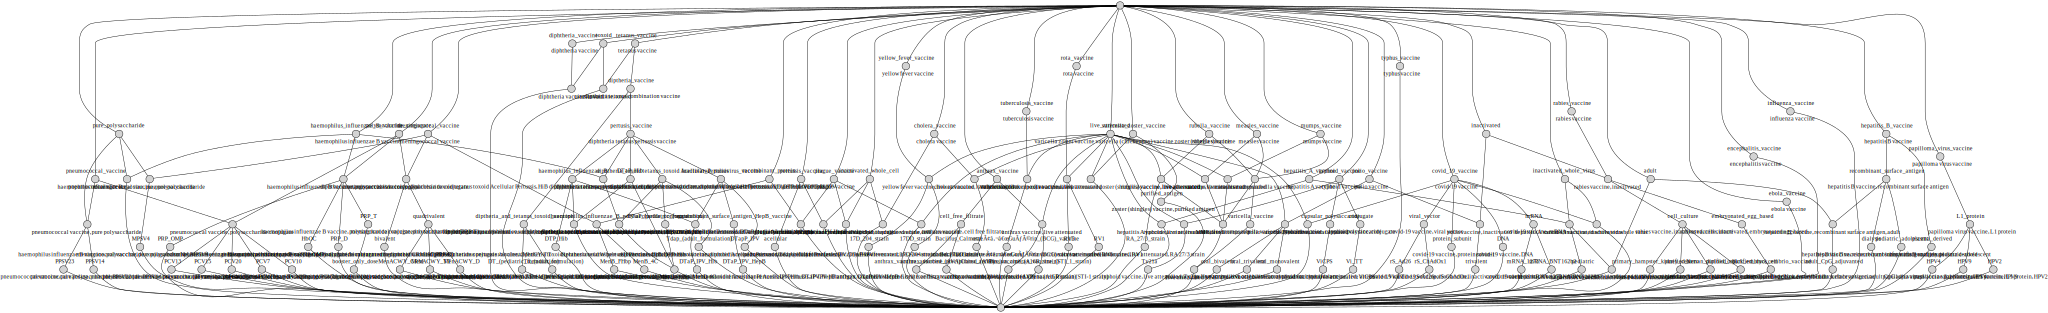

In [31]:
c.lattice.graphviz()

In [32]:
# create the concept table
concept_df = pd.DataFrame({"id" : range(len(concept_names)), "concept_name" : concept_names})

In [33]:
concept_relationship_df = pd.DataFrame({"id_1" : [x for x, _ in maps_to_list], 
                                        "relationship" : "Is a", 
                                        "id_2" : [x for _ , x in maps_to_list]})

In [35]:
concept_relationship_df


,id_1,relationship,id_2
0,0,Is a,1
1,0,Is a,2
2,0,Is a,3
3,0,Is a,4
4,0,Is a,5
...,...,...,...
286,158,Is a,160
287,159,Is a,163
288,160,Is a,161
289,161,Is a,163


In [162]:
concept_df.to_csv(os.getcwd() + "\\vaccine_fca_concept.csv", index = False)

In [37]:
concept_relationship_df.to_csv(os.getcwd() + "\\vaccine_fca_concept_relationship.csv", index = False)

# simple combo example

In [27]:
# read in the formal context
csv_file=os.getcwd() + '\\td-combo-example-formal-context.csv'
pd.read_csv(csv_file, keep_default_na=False)

,name,d_tetanus,d_diptheria,m_toxoid,f_adult,f_pediatric
0,tetanus,X,,,,
1,diptheria,,X,,,
2,T&D,X,X,,,
3,T toxoid,X,,X,,
4,D toxoid,,X,X,,
5,tetanus toxoid & diptheria toxoid,X,X,X,,
6,Td (adult),X,X,X,X,
7,Dt (pediatric),X,X,X,,X


In [28]:
# create the context object from the csv file
c = Context.fromfile(csv_file, frmat='csv')

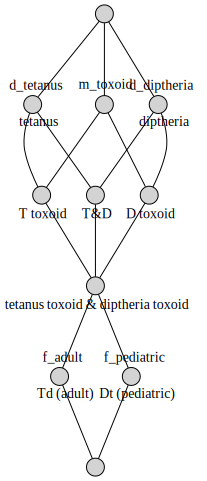

In [29]:
c.lattice.graphviz()

In [32]:
csv_file=os.getcwd() + '\\td-combo-example-formal-context2.csv'
pd.read_csv(csv_file, keep_default_na=False)


,name,d_tetanus,d_diptheria,m_T_toxoid,m_D_toxoid,f_adult,f_pediatric
0,Tetanus,X,,,,,
1,Diptheria,,X,,,,
2,T&D,X,X,,,,
3,T toxoid,X,,X,,,
4,D toxoid,,X,,X,,
5,T toxoid & D toxoid,X,X,X,X,,
6,Td (adult),X,X,X,X,X,
7,Dt (pediatric),X,X,X,X,,X


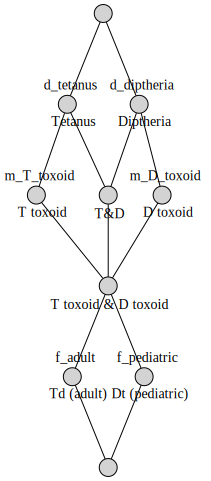

In [33]:
c = Context.fromfile(csv_file, frmat='csv')
c.lattice.graphviz()

In [7]:
csv_file=os.getcwd() + '\\formal_context2.csv'
pd.read_csv(csv_file, keep_default_na=False)

,id,D_tetanus,D_diptheria,M_tetanus_toxoid,M_diptheria_toxoid,F_DT_pediatric,D_polio,M_IPV,F_DT_IPV_pediatric,F_Td_adult
0,1,X,X,X,X,X,,,,
1,2,X,X,X,X,,X,X,X,
2,3,X,X,X,X,,,,,X
3,4,X,,X,,,,,,
4,5,X,,X,,,,,,
5,6,,X,,X,,,,,
6,7,,X,,X,,,,,
7,8,,,,,,X,X,,
8,9,X,X,X,X,,,,,
9,10,X,X,X,X,,X,X,,


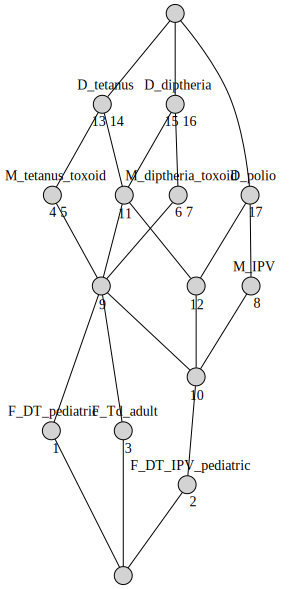

In [8]:
c = Context.fromfile(csv_file, frmat='csv')
c.lattice.graphviz()